# Identifying commercial centers using Points of Interest (POI) data

# [Data Source](https://www.openstreetmap.org/#map=11/28.6518/77.2219)

## Connaught Place (New Delhi)

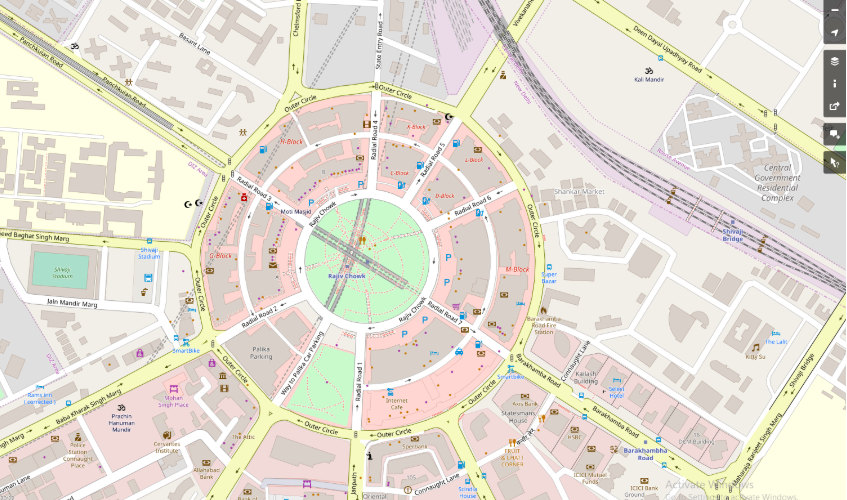

## Importing libraries 


#### Warnings
Warnings messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program. For example, one might want to issue a warning when a program uses an obsolete module.

#### NumPy
NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays

#### Pandas
Pandas library is one of the things that makes Python a great programming language for data analysis

In [1]:
#importing Libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

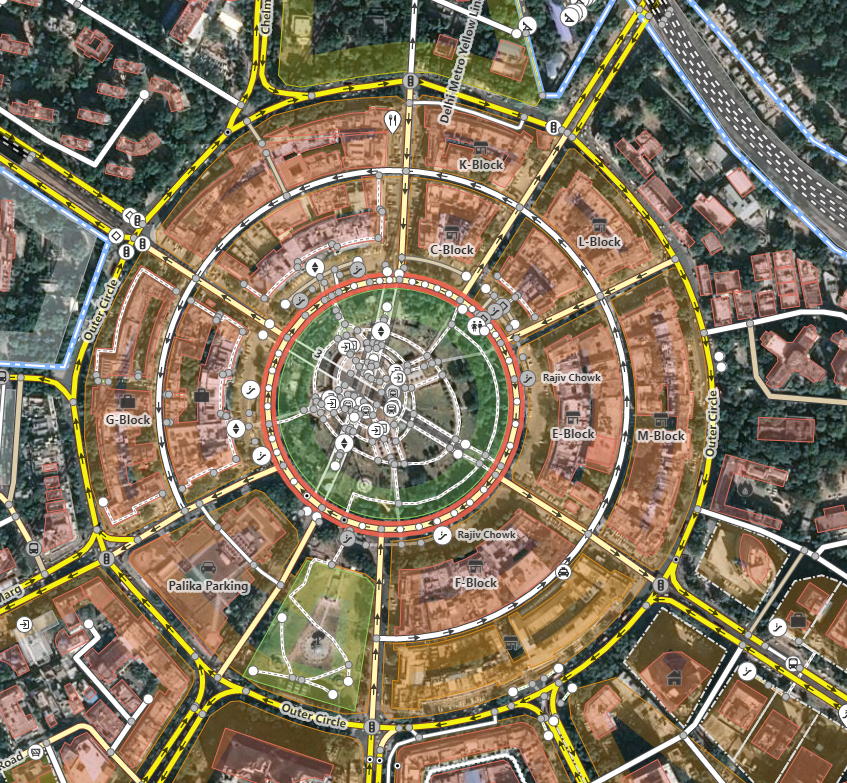

# Data Preprocessing

**Data Information**
Getting datd from [Data](https://www.openstreetmap.org/#map=11/28.6518/77.2219) (**OSM** data at 28.63282,77.22040 (coordinates) .The **OSM** file was converted into **CSV** file.

**About the Data** 
This data is from Canaught place , showing the building's **X** , **Y** coordinates , the **frequency** and **passenger_lines** , rest of the data like shop,brand,wikidata,postcode is **NaN**.

In [6]:
# Reading the csv
railways = pd.read_csv('./railways.csv')

In [7]:
# Getting the number of Features and Values
railways.shape

(2, 10)

## Data Cleaning

In this section we will be doing univariate analysis and removing outlier/illegitimate values which may be caused due to some error

In [8]:
#Feature and Values.
railways.head()

X          Y     osm_id railway  passenger_lines   electrified  \
0  77.005173  28.482297  313488541    rail                2  contact_line   
1  77.044014  28.528064  195207642    rail                4  contact_line   

   frequency  gauge  voltage usage  
0         50   1676    25000  main  
1         50   1676    25000  main

In [9]:
railways[0:2]

X          Y     osm_id railway  passenger_lines   electrified  \
0  77.005173  28.482297  313488541    rail                2  contact_line   
1  77.044014  28.528064  195207642    rail                4  contact_line   

   frequency  gauge  voltage usage  
0         50   1676    25000  main  
1         50   1676    25000  main

In [10]:
type(railways.X.values)

numpy.ndarray

# Data-preperation
## Clustering/Segmentation

In [11]:
railways_cords = pd.DataFrame({'x': railways.X.values, 'y':railways.Y.values})

### Applying KMeans Clustering

In [26]:
# clustering
kmeans = KMeans(n_clusters=2, random_state=42).fit(railways_cords)

In [27]:
# Calculating the centroid 
kmeans.cluster_centers_

array([[77.00517325, 28.48229695,  0.        ],
       [77.0440141 , 28.5280643 ,  0.        ]])

In [28]:
# Labeling the centroid
kmeans.labels_

array([0, 1])

In [29]:
# finding the inertia
kmeans.inertia_

0.0

In [30]:
# assigning labels to the values and features
railways_cords['label'] = kmeans.labels_

In [31]:
#### Representing the final data after clustering and segmentation
railways_cords

x          y  label
0  77.005173  28.482297      0
1  77.044014  28.528064      1

# Data Visualization part

In [32]:
# using matplotlib 
import matplotlib.pyplot as plt

In [33]:
# using seaborn
import seaborn as sns

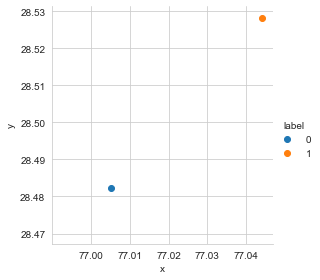

In [34]:
# visualization
sns.set_style('whitegrid');
sns.FacetGrid(railways_cords, hue='label', size=4) \
.map(plt.scatter, 'x', 'y') \
.add_legend();
plt.show();

# After clustering this data of roads , we find that the clusters keeps on breaking.But after breaking into two clusters . The value of interia remians almost same and further breaking is not useful.

# *Conclusion 
The most effective region to invest is not a pont since the data points and region of railway track is very less as compared to the other data.